In [1]:
import joblib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from kinect_smoothing.utils import plot_image_frame, plot_trajectories, plot_trajectory_3d

# Kinect - Openpose Pipline for Trajectory Prediction

## 1. read data

original depth image frames


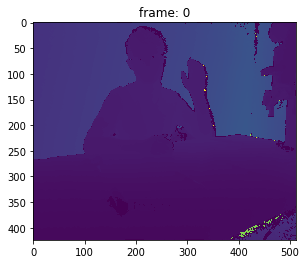

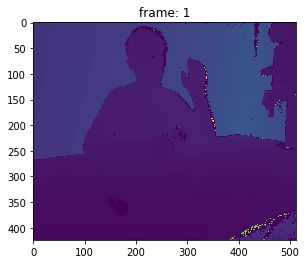

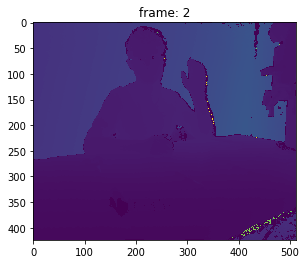

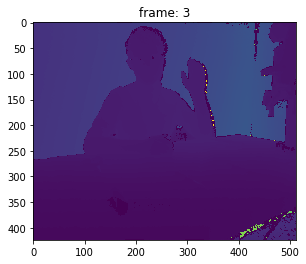

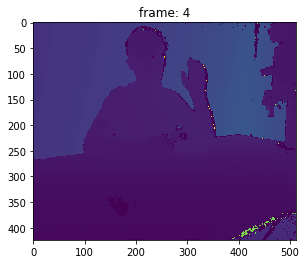

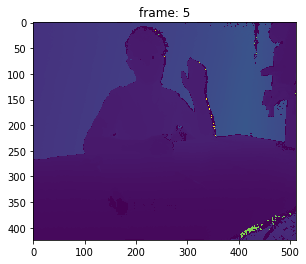

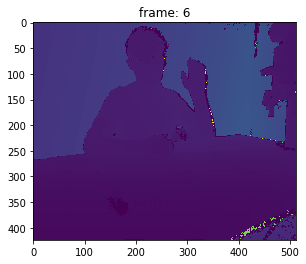

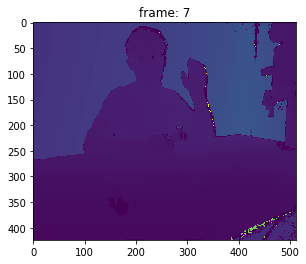

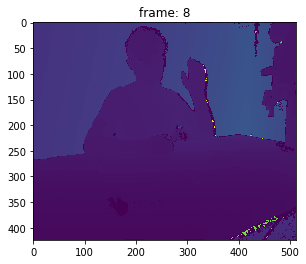

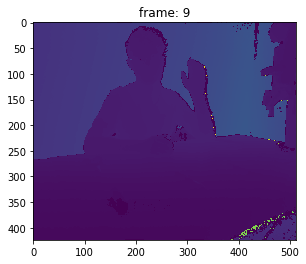

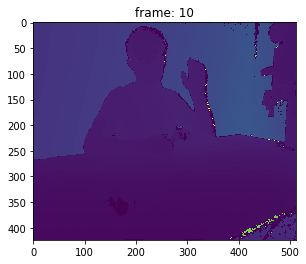

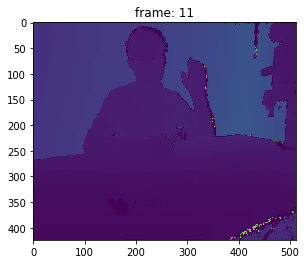

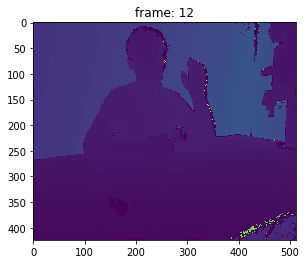

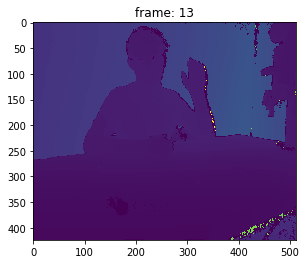

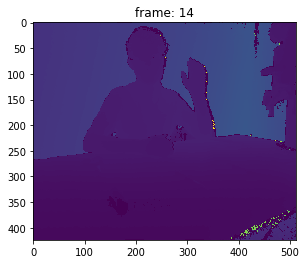

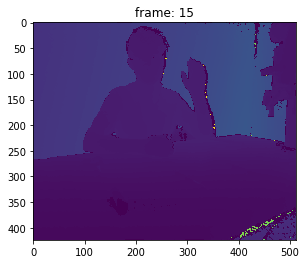

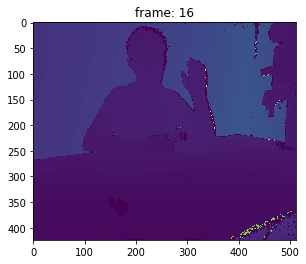

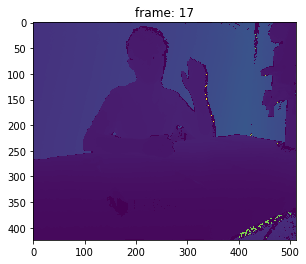

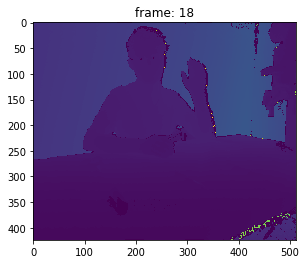

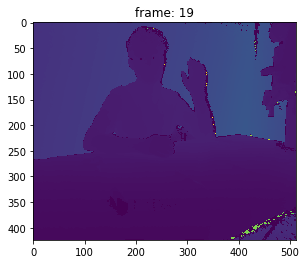

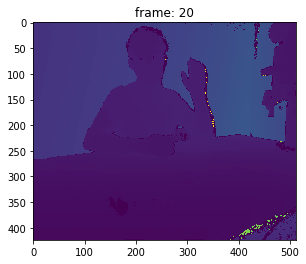

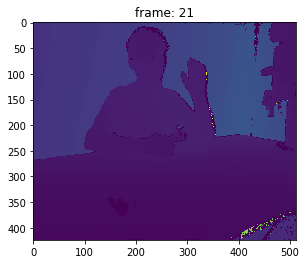

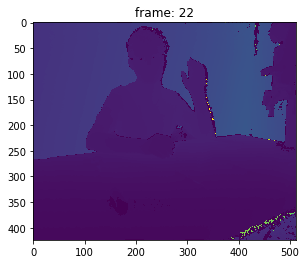

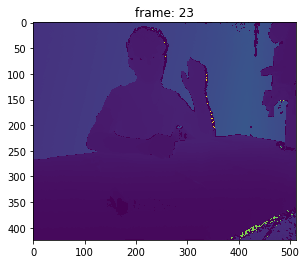

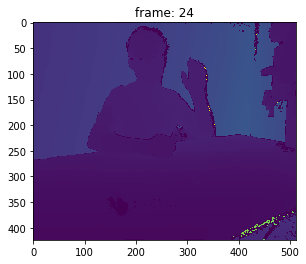

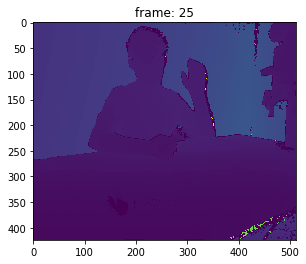

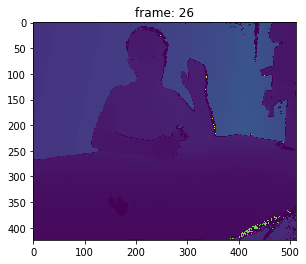

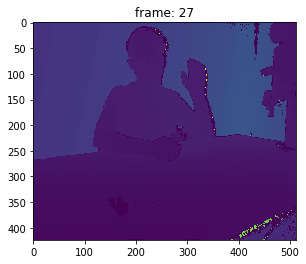

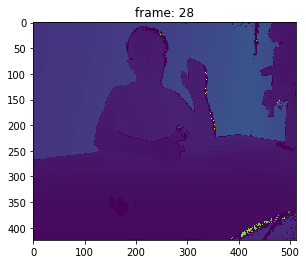

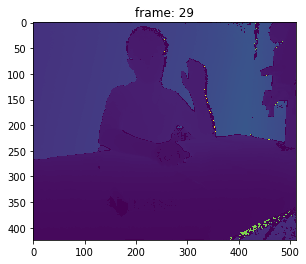

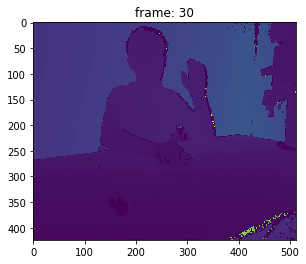

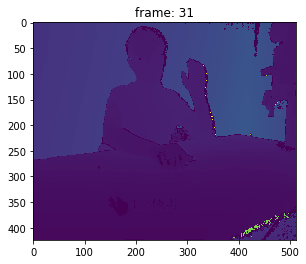

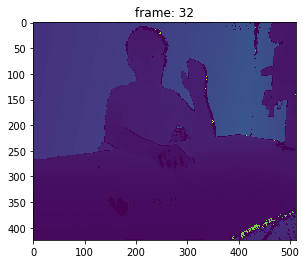

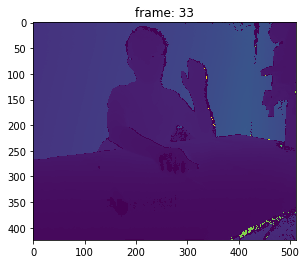

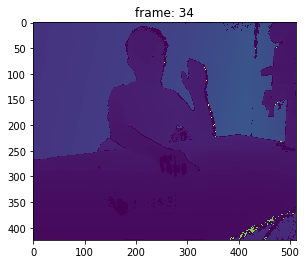

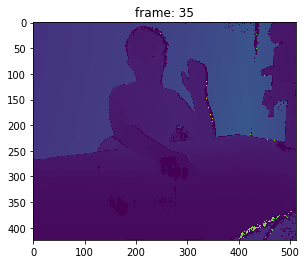

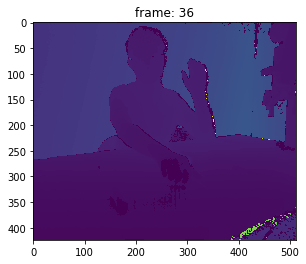

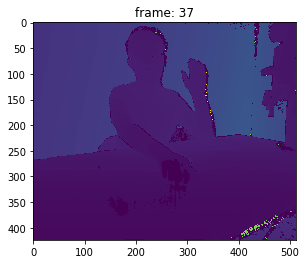

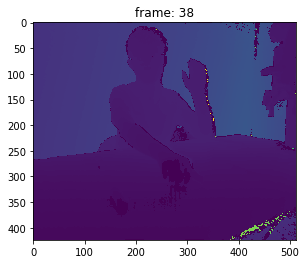

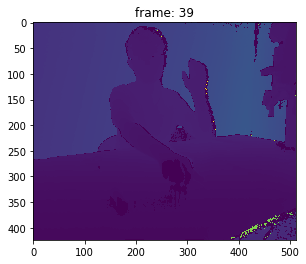

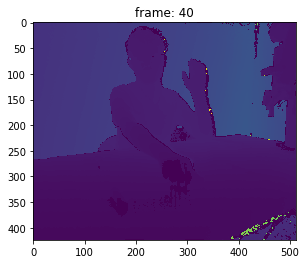

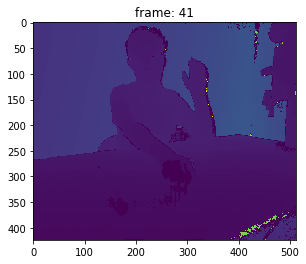

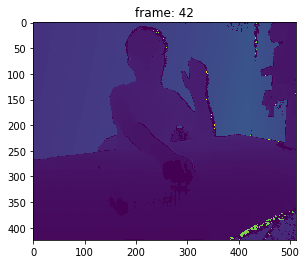

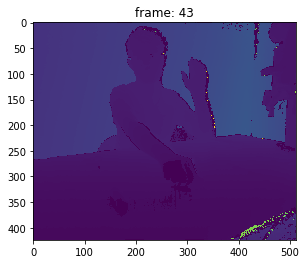

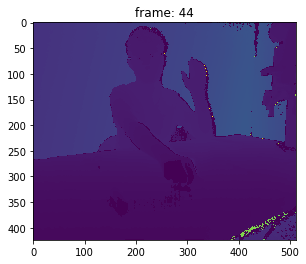

In [3]:
image_path='data/sample_img.pkl'
image_frame = joblib.load(image_path)
print('original depth image frames')
plot_image_frame(image_frame)

openpose trajectories


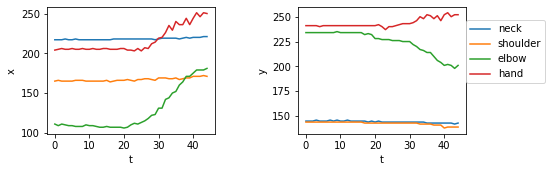

In [4]:
pose_path='data/sample_pose.pkl'
pose_frame =joblib.load(pose_path)
print('openpose trajectories')
plot_trajectories(pose_frame)

## 2. smooth depth image

In [5]:
from kinect_smoothing import HoleFilling_Filter, Denoising_Filter

hole filled image frames (filled invalid values)


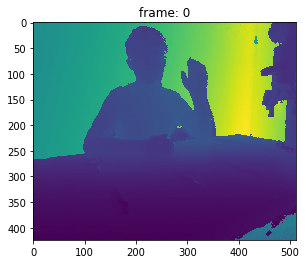

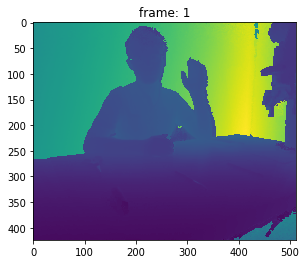

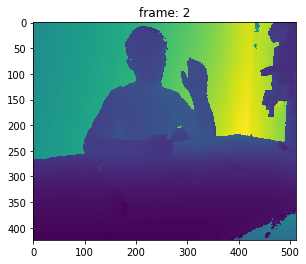

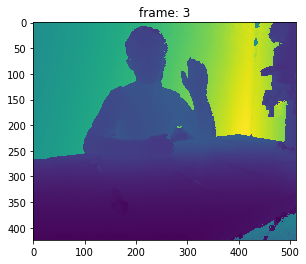

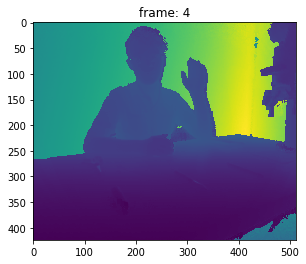

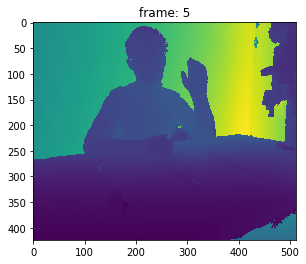

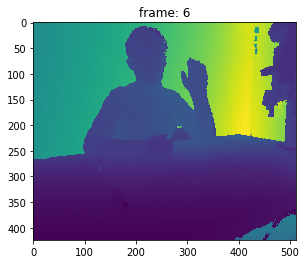

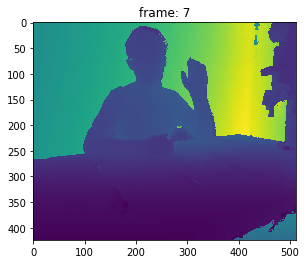

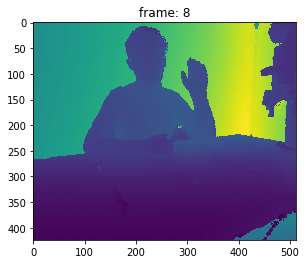

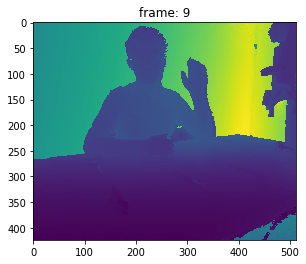

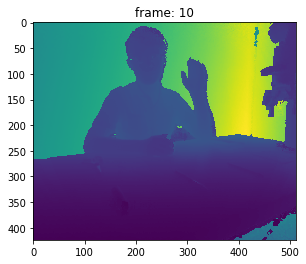

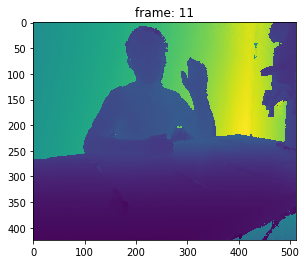

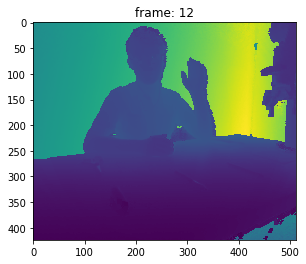

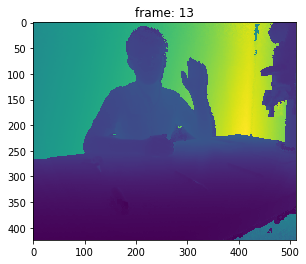

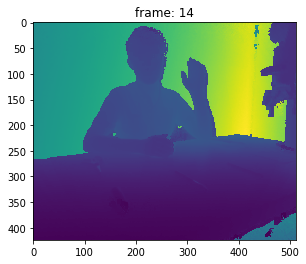

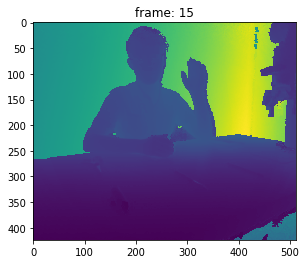

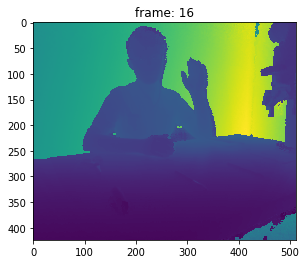

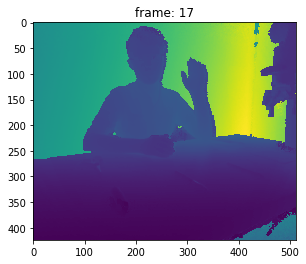

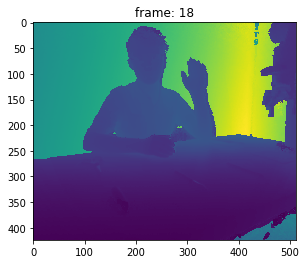

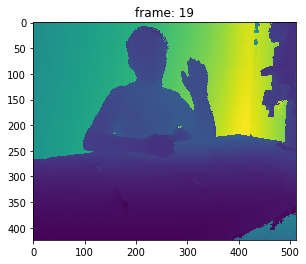

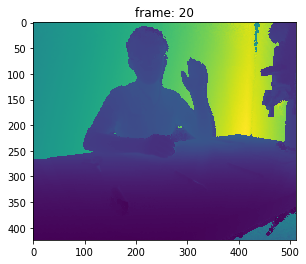

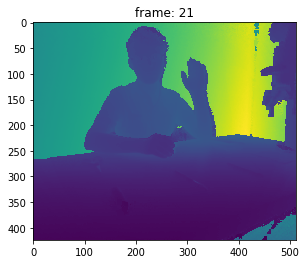

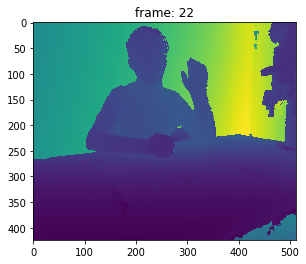

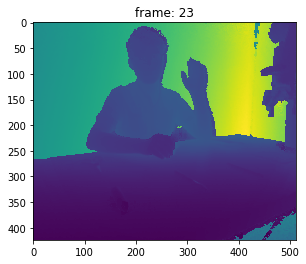

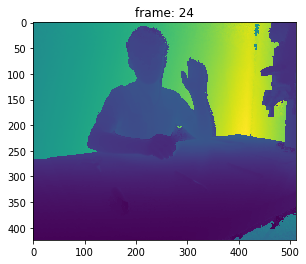

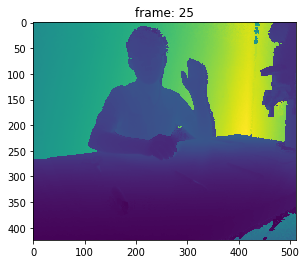

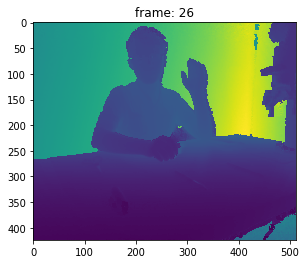

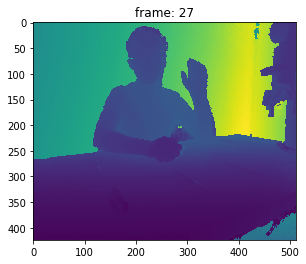

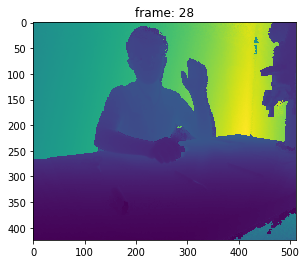

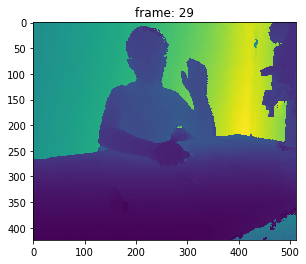

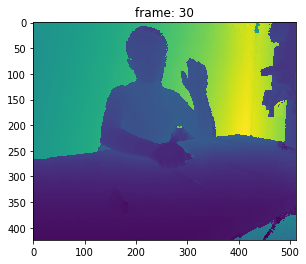

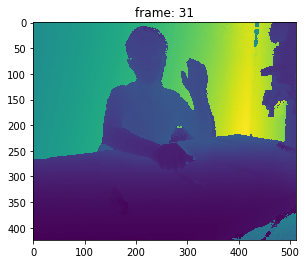

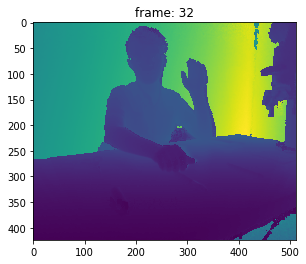

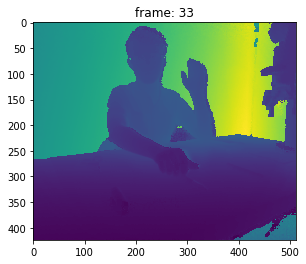

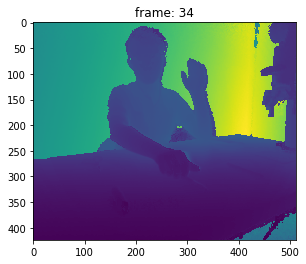

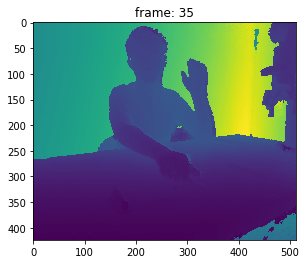

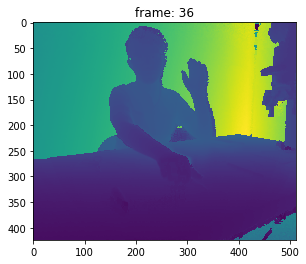

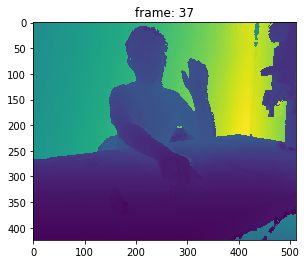

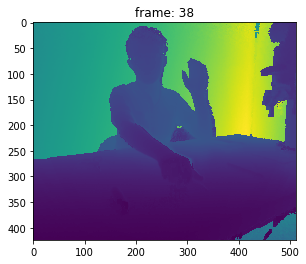

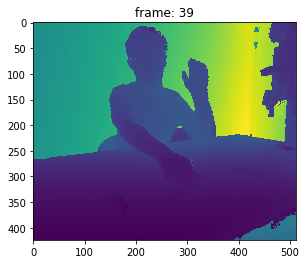

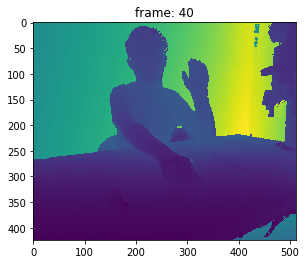

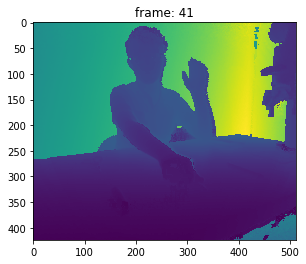

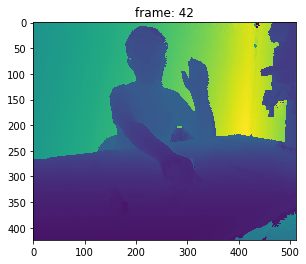

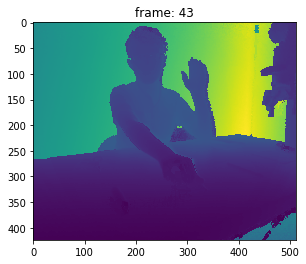

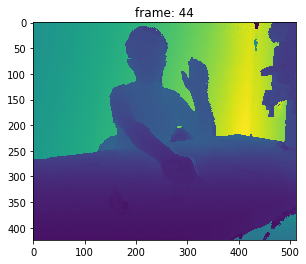

In [6]:
hole_filter = HoleFilling_Filter(flag='min')
hf_image_frame = hole_filter.smooth_image_frames(image_frame)
print('hole filled image frames (filled invalid values)')
plot_image_frame(hf_image_frame)

denoised image frames (optional)


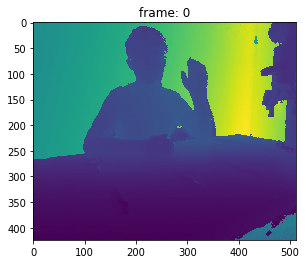

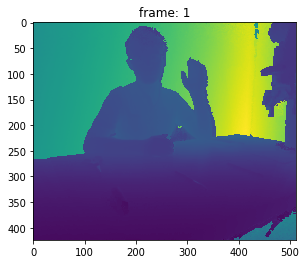

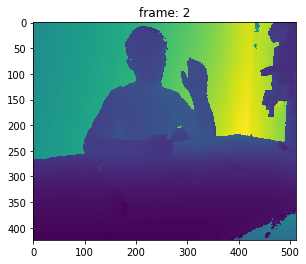

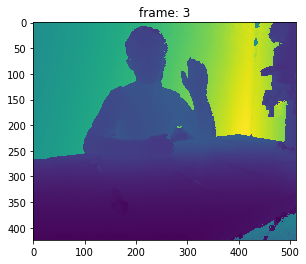

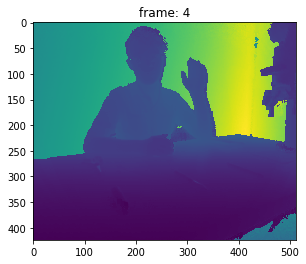

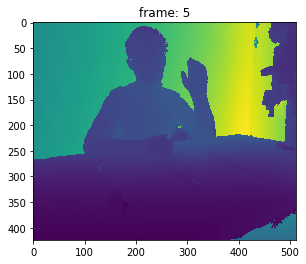

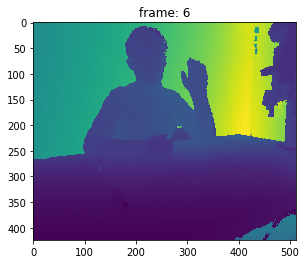

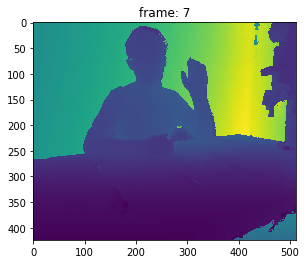

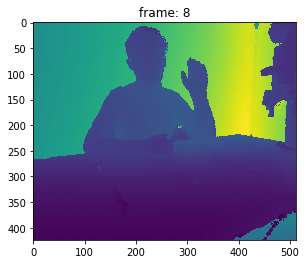

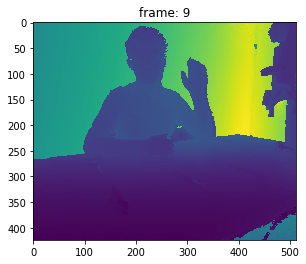

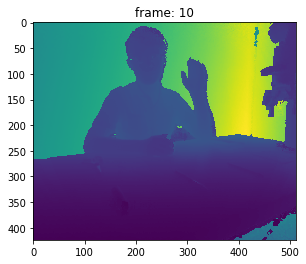

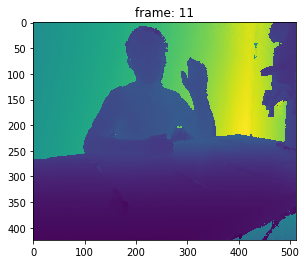

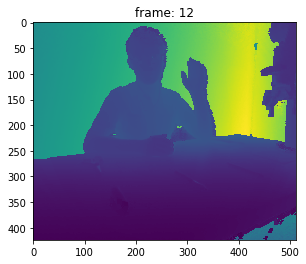

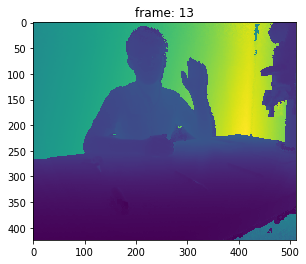

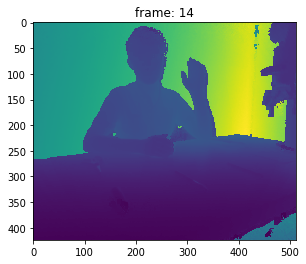

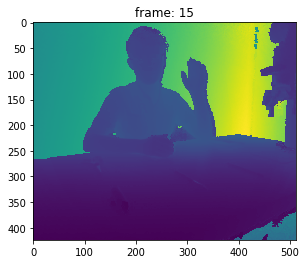

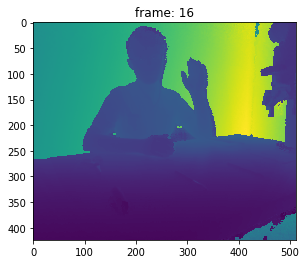

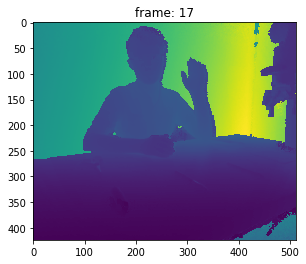

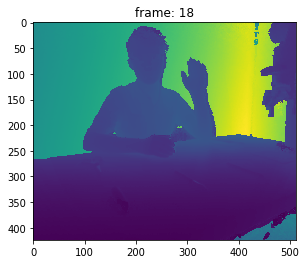

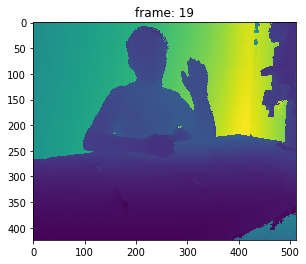

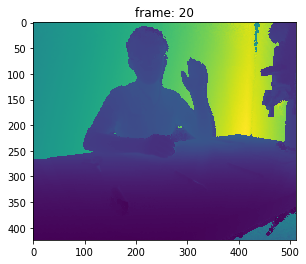

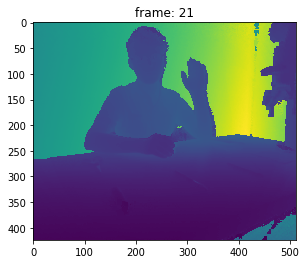

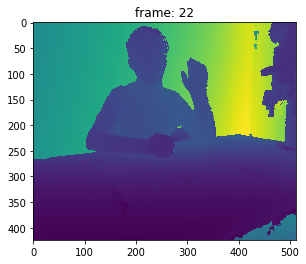

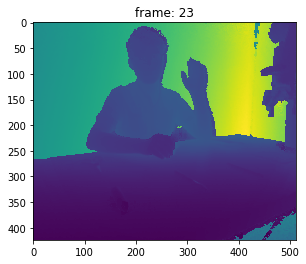

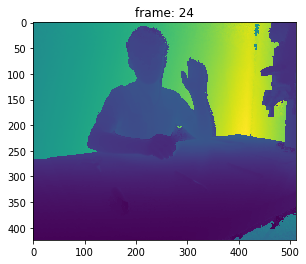

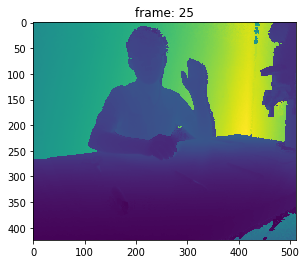

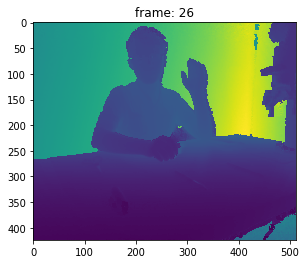

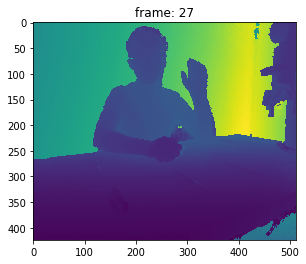

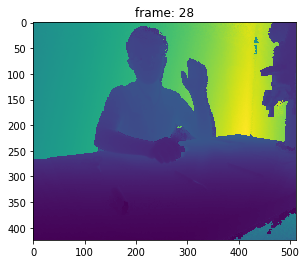

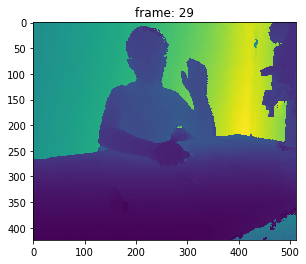

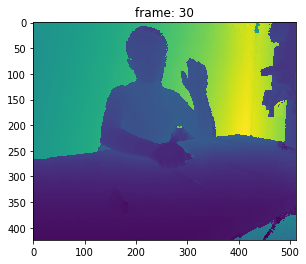

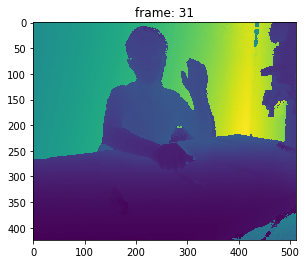

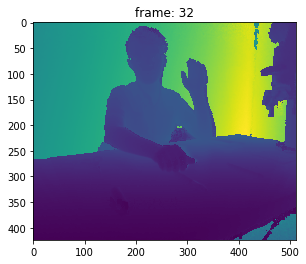

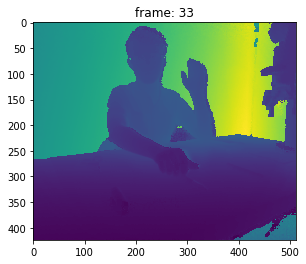

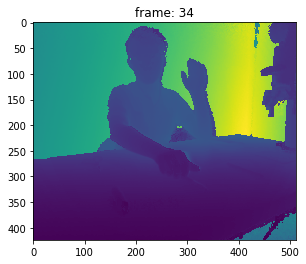

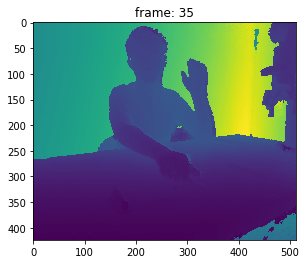

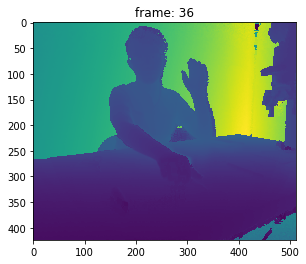

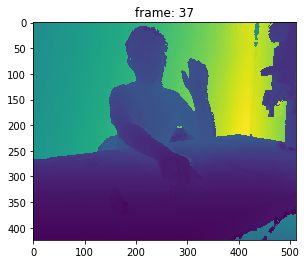

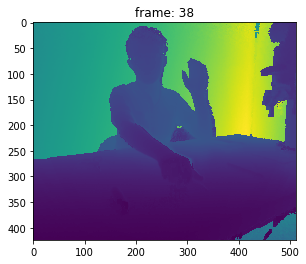

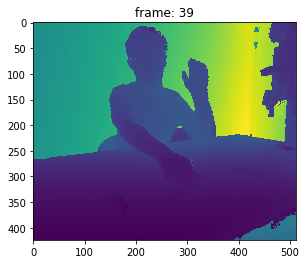

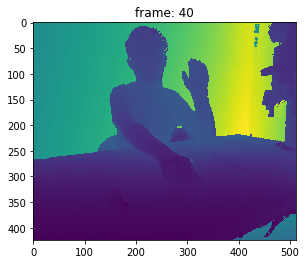

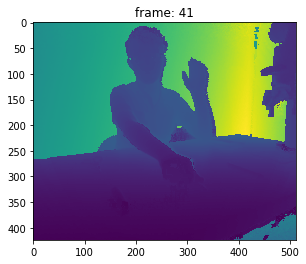

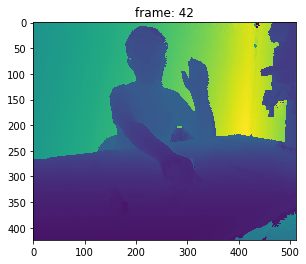

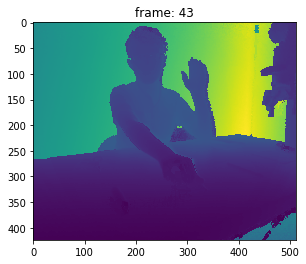

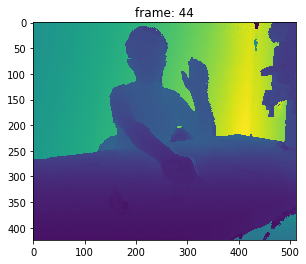

In [7]:
noise_filter = Denoising_Filter(flag='anisotropic', theta=60) 
denoise_image_frame = noise_filter.smooth_image_frames(hf_image_frame)
print('denoised image frames (optional)')
plot_image_frame(denoise_image_frame)

## 3.  get the depth coordinate

In [8]:
from kinect_smoothing import Crop_Filter
from kinect_smoothing import Coordinate_Calculator

raw trajectories


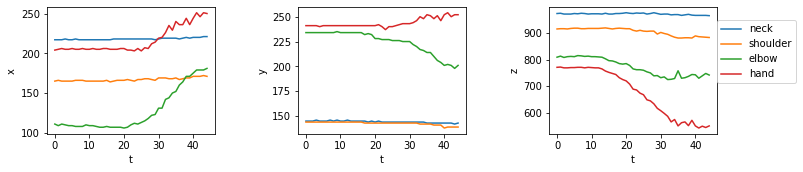

In [9]:
pose_filter = Crop_Filter(flag='pchip')
cropped_pose_frame = pose_filter.smooth_multi_trajectories(pose_frame)
calcutator = Coordinate_Calculator()
raw_pose = calcutator.get_depth_coordinate(denoise_image_frame, cropped_pose_frame)
print('raw trajectories')
plot_trajectories(raw_pose)

## 4. smooth the trajectory and convert to real coordinate

In [10]:
from kinect_smoothing import Smooth_Filter

smoothed raw trajectories


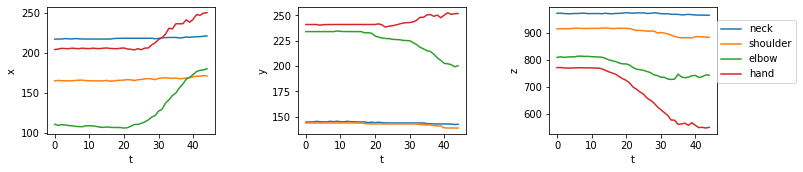

In [11]:
smoothed_raw_pose = pose_filter.smooth_multi_trajectories(raw_pose)
smooth_filter = Smooth_Filter(flag='kalman')
smoothed_raw_pose = smooth_filter.smooth_multi_trajectories(smoothed_raw_pose)
print('smoothed raw trajectories')
plot_trajectories(smoothed_raw_pose)

real word trajectories


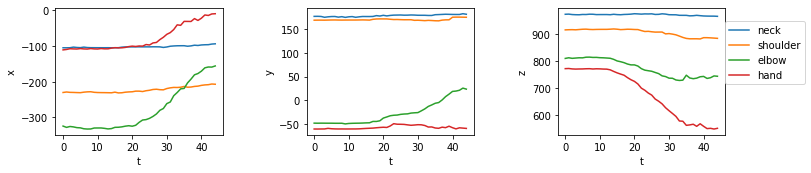

In [12]:
real_pose = calcutator.convert_real_coordinate(smoothed_raw_pose)
print('real word trajectories')
plot_trajectories(real_pose)

hand trjectory 3d


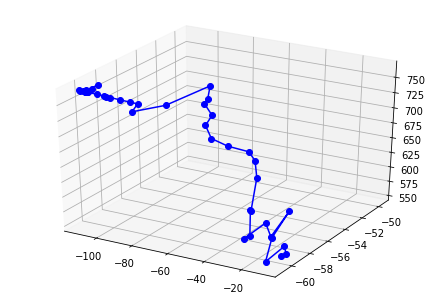

In [13]:
print('hand trjectory 3d')
plot_trajectory_3d(real_pose[:,-1,])

## 5. motion detection (optional)

In [14]:
from kinect_smoothing import Motion_Sampler

real word trajectories (stillness point has been deleted)


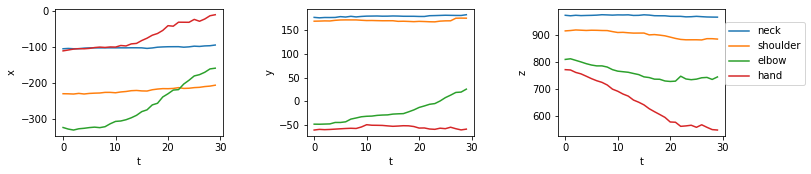

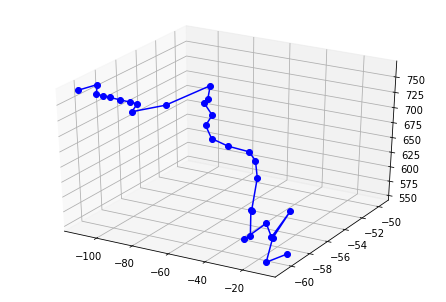

In [16]:
motion_filter = Motion_Sampler(motion_threshold=15, min_time_step=30)
sampled_real_pose =   motion_filter.motion_detection(real_pose)
print('real word trajectories (stillness point has been deleted)')
plot_trajectories(sampled_real_pose)
plot_trajectory_3d(sampled_real_pose[:,-1,])

## Simple pipline

In [17]:
from kinect_smoothing import Kinect_Openpose_Pipeline

real word trajectories


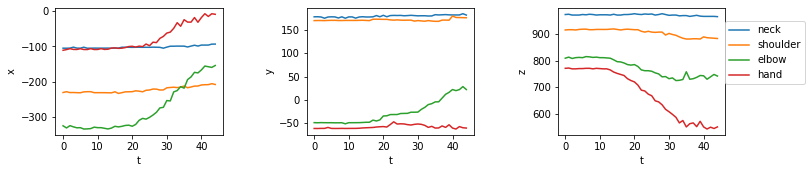

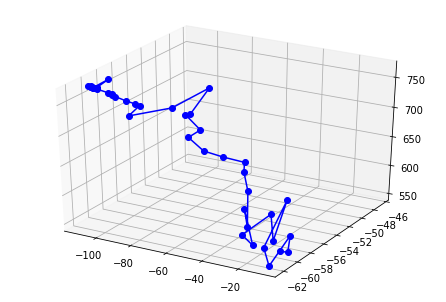

In [18]:
pipeline = Kinect_Openpose_Pipeline()
real_pose = pipeline(image_frame,pose_frame)
print('real word trajectories')
plot_trajectories(real_pose)
plot_trajectory_3d(real_pose[:,-1,])